In [1]:
import pandas as pd

df = pd.read_parquet('./../data/dataset_site_info.parquet')


In [2]:
from cmSim.utils import get_mcm_data

mcm_data = get_mcm_data('./../data/zip_mcm_dump.json')


Unzipping and loading json file... Done


In [3]:
from cmSim.utils import get_country_from_site, get_pwg_from_dataset

df['country'] = df['node_name'].apply(get_country_from_site)
df['pwg'] = df['dataset_name'].apply(get_pwg_from_dataset, mcm_data=mcm_data)

df.head(None)


,dataset_name,dataset_id,replica_time_create,node_name,rep_size,min_time,max_time,br_user_group_id,tier,pwg
0,/JetHT/Run2016B-21Feb2020_ver2_UL2016_HIPM-v1/AOD,1553410,20200619,T2_US_Purdue,2.570957e+10,2020-06-20,2020-12-31,42.0,AOD,None
1,/PAMinimumBias4/PARun2016C-PromptReco-v1/AOD,951505,20171015,T2_IN_TIFR,2.668056e+13,2019-01-01,2020-06-10,42.0,AOD,None
2,/GluGluToContinToZZTo2mu2nu_13TeV_MCFM701_pyth...,1114967,20200113,T2_FI_HIP,2.060427e+11,2020-01-14,2020-04-29,42.0,AODSIM,HIG
3,/WJetsToLNu_HT-70To100_TuneCP5_13TeV-madgraphM...,1247050,20200323,T2_US_Caltech,1.034198e+13,2020-03-23,2020-05-05,22.0,AODSIM,SUS
4,/HLTPhysics/Commissioning2017-PromptReco-v1/AOD,998897,20200212,T2_EE_Estonia,1.705387e+11,2020-02-13,2020-03-25,42.0,AOD,None
...,...,...,...,...,...,...,...,...,...,...
1268205,/GluGluHToWWToLNuQQ_M140_NNPDF31_TuneCP5_PSwei...,1353747,20190611,T2_FR_IPHC,4.005138e+09,2019-06-12,2019-06-26,18.0,AODSIM,HIG
1268206,/ggZH_HToGG_ZToNuNu_M125_13TeV_powheg_pythia8_...,1307530,20190402,T1_US_FNAL_Disk,1.705961e+09,2019-04-03,2019-04-09,18.0,AODSIM,HIG
1268207,/ST_tW_top_5f_NoFullyHadronicDecays_13TeV_PSwe...,1332017,20190506,T2_BE_UCL,5.500226e+08,2019-05-06,2019-07-12,18.0,AODSIM,TOP
1268208,/GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_T...,1573739,20200724,T2_US_Wisconsin,8.395474e+10,2020-09-30,2020-10-01,NaN,AODSIM,EGM


In [4]:
from cmSim.country import Country

df_country = df[df['country'] == 'USA']
country = Country.from_dataframe(df_country)


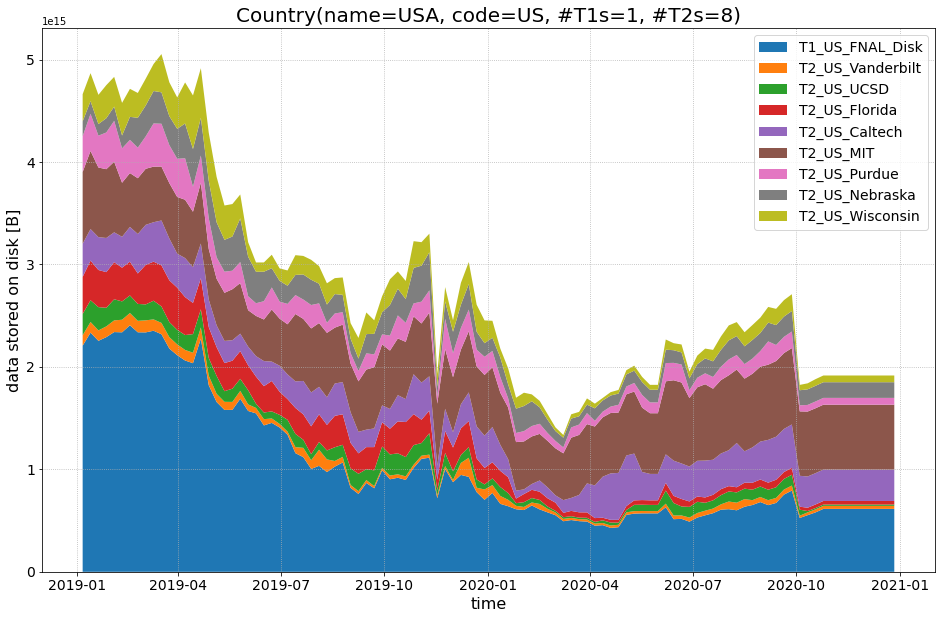

In [5]:
import pylab as plt

fig, ax = plt.subplots(figsize=(18, 12))
country.plot_storage_history_by_site(ax, datatier='AODSIM')


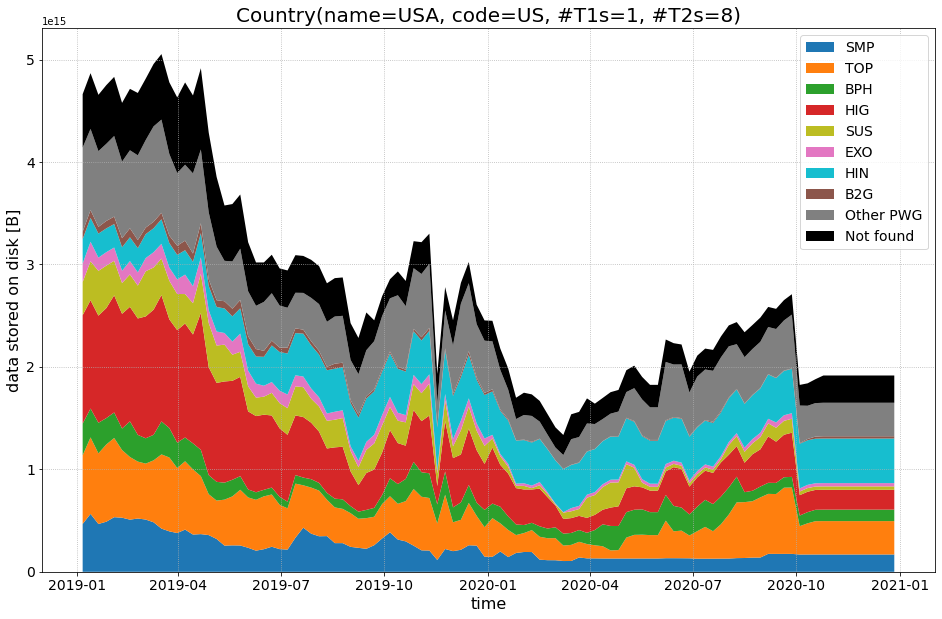

In [6]:
fig, ax = plt.subplots(figsize=(16, 10))
country.plot_storage_history_by_pag(ax, datatier='AODSIM')
